In [36]:
import math
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [37]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm

In [38]:
nifty = get_history(symbol='RELIANCE',
                   start=date(2000,1,1),
                   end=date(2019,1,1))


In [39]:
nifty.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [40]:
nifty.shape

(4733, 14)

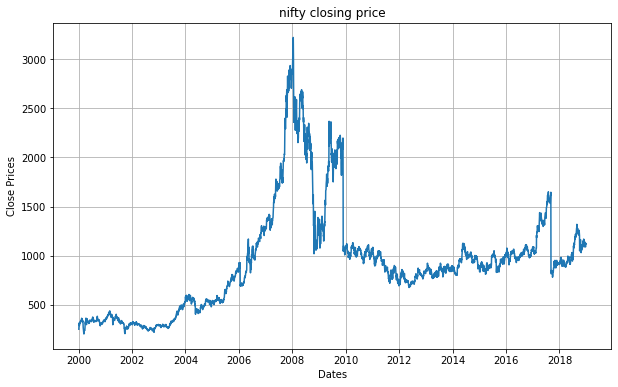

In [41]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(nifty['Close'])
plt.title('nifty closing price')
plt.show()

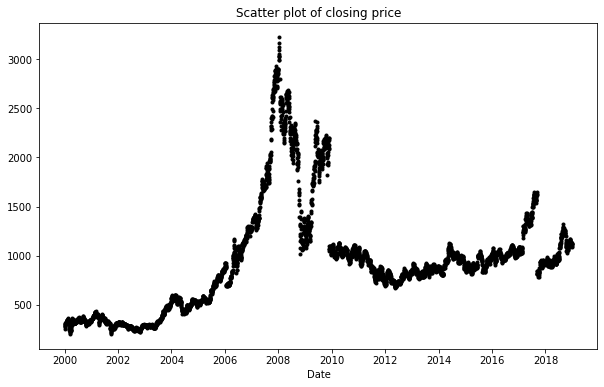

In [42]:
plt.figure(figsize=(10,6))
df_close = nifty['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

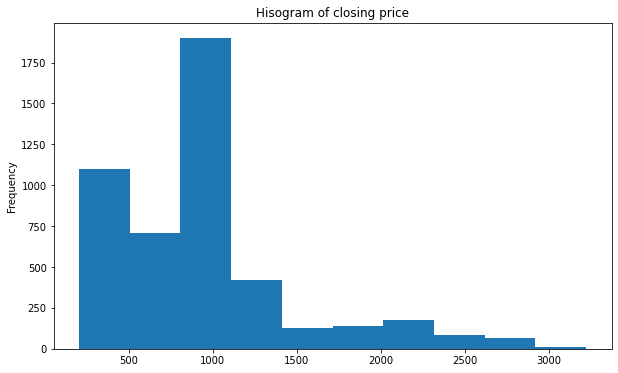

In [43]:
plt.figure(figsize=(10,6))
df_close = nifty['Close']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

ARIMA Model

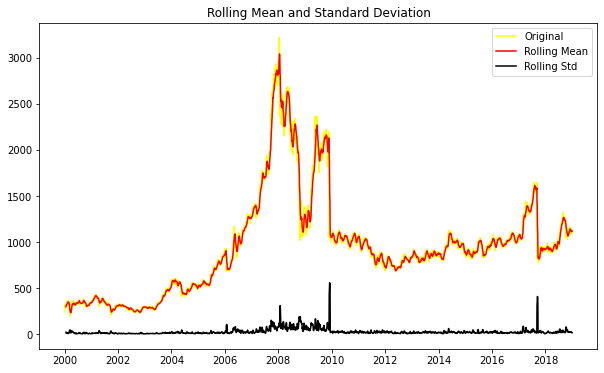

Results of dickey fuller test
Test Statistics                  -2.100681
p-value                           0.244241
No. of lags used                 20.000000
Number of observations used    4712.000000
critical value (1%)              -3.431739
critical value (5%)              -2.862154
critical value (10%)             -2.567097
dtype: float64


In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(nifty['Close'])

<Figure size 720x432 with 0 Axes>

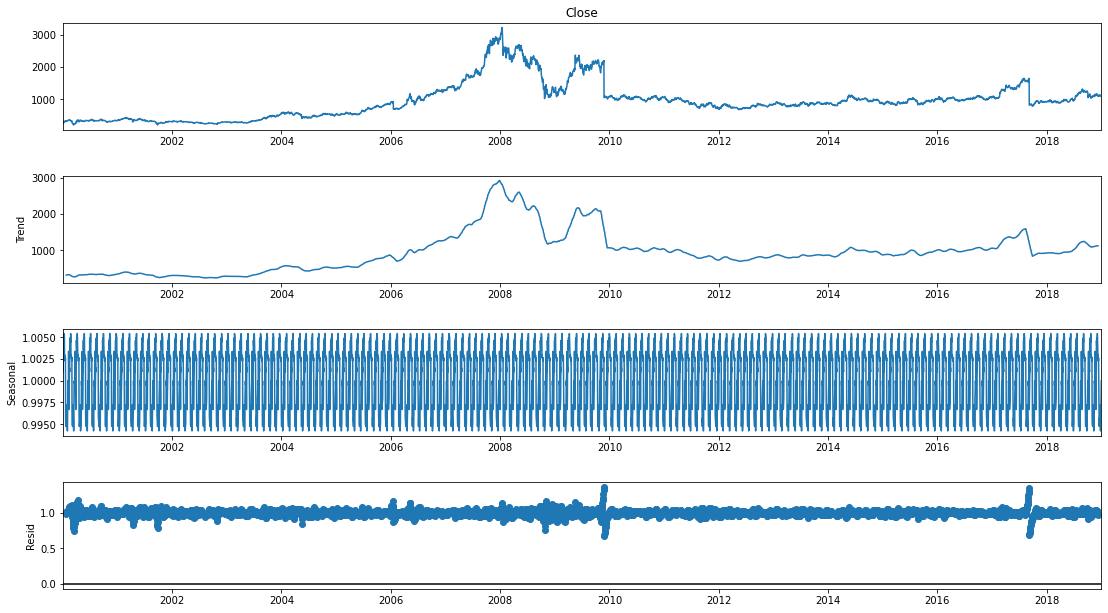

In [45]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


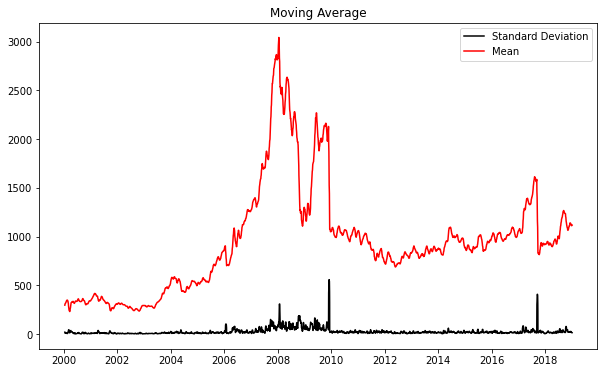

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#df_log = np.log(nifty['Close'])
#df_log = np.log(result)
df_log = nifty['Close']
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

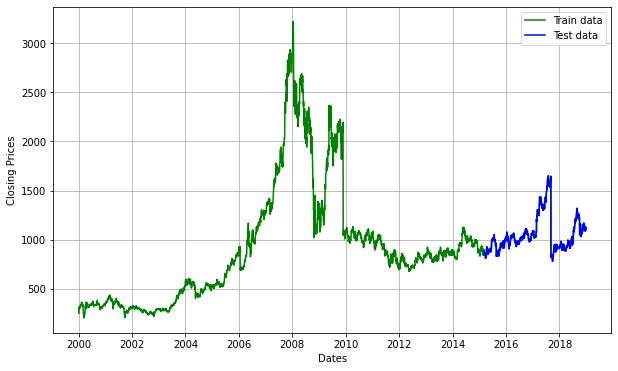

In [47]:
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [48]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=37344.665, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=37340.182, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=37340.192, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=37342.750, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=37342.132, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=37342.172, Time=2.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=37330.390, Time=3.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=37312.387, Time=3.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=37316.879, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=37304.196, Time=8.50 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=37302.586, Time=4.65 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=37333.124, Time=2.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=37304.206, Time=10.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=37314.830, Time=2.24 sec
 ARIMA(3,1,3)(0,0,

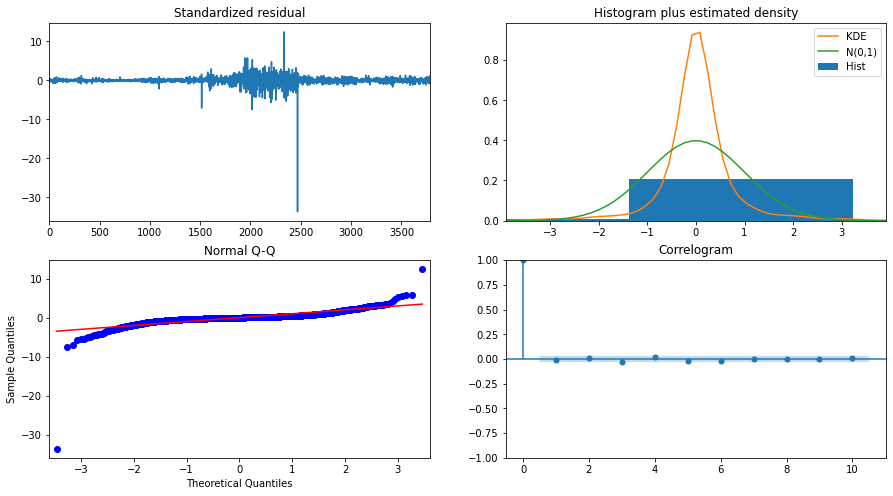

In [49]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [50]:
warnings.filterwarnings("ignore")
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit(disp=-1)
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3782
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -18645.098
Method:                       css-mle   S.D. of innovations             33.482
Date:                Sat, 31 Jul 2021   AIC                          37304.196
Time:                        11:48:34   BIC                          37347.862
Sample:                             1   HQIC                         37319.719
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1602      0.522      0.307      0.759      -0.862       1.183
ar.L1.D.Close     1.2118      0.076     16.025      0.000       1.064       1.360
ar.L2.D.Close    -0.8211      0.070    -

In [51]:
# Forecast

fc, se, conf = fitted.forecast(947, alpha=0.05)  # 95% confidence

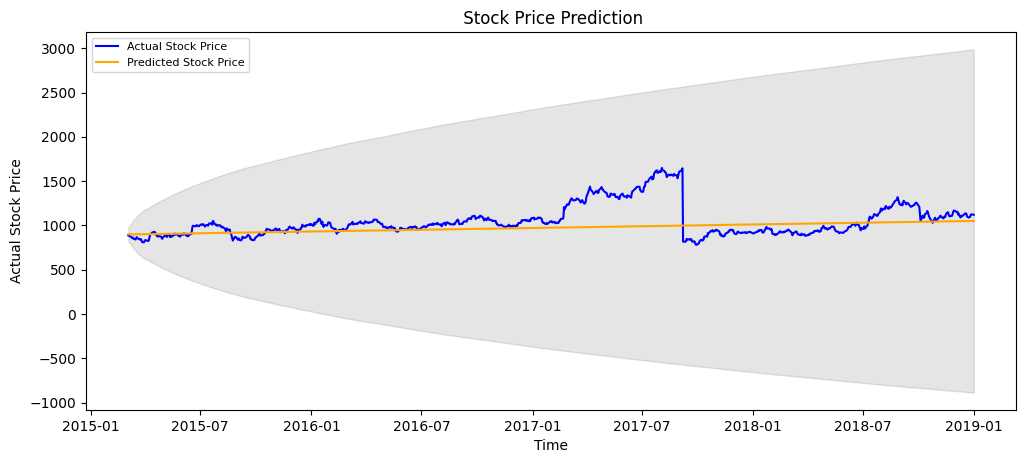

In [52]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [53]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 34169.12316285703
MAE: 123.46117626053147
RMSE: 184.84891983145866
MAPE: 0.10533722734741448


In [54]:
##################################  Tensorflow    ######################################

LSTM Network based Model

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten,LSTM,RepeatVector,TimeDistributed,Conv1D,MaxPooling1D
from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from livelossplot.keras import PlotLossesCallback

from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
nifty.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [58]:
nifty['Date'] = nifty.index
nifty.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN,2000-01-03
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN,2000-01-04
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN,2000-01-05
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN,2000-01-06
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN,2000-01-07


In [59]:
nifty.shape

(4733, 15)

In [60]:
#a = nifty.shape

In [61]:
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] =  nifty['Date']
data2['Open'] = nifty['Open']
data2['High'] = nifty['High']
data2['Low'] = nifty['Low']
data2['Close'] = nifty['Close']

In [62]:
data2.head()

,Date,Open,High,Low,Close
Date,,,,,
2000-01-03,2000-01-03,237.50,251.70,237.50,251.70
2000-01-04,2000-01-04,258.40,271.85,251.30,271.85
2000-01-05,2000-01-05,256.65,287.90,256.65,282.50
2000-01-06,2000-01-06,289.00,300.70,289.00,294.35
2000-01-07,2000-01-07,295.00,317.90,293.00,314.55


In [63]:
train_set = data2.iloc[:, 4:5].values

In [64]:
train_set

array([[ 251.7 ],
       [ 271.85],
       [ 282.5 ],
       ...,
       [1125.55],
       [1121.25],
       [1121.  ]])

In [65]:
train_set.shape

(4733, 1)

In [66]:
b=train_set.shape[0]

In [67]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

In [68]:
a=60

In [69]:
####### This step is for creating the dataset in the right shape ###### Here 60 can be a hyperparameter ######

X_train = []
y_train = []
for i in range(a, b-1):
    X_train.append(training_set_scaled[i-a:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [70]:
X_train.shape

(4672, 60, 1)

In [117]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.20))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.20))
regressor.add(Dense(units = 1))

In [118]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
146/146 [==============================] - 30s 125ms/step - loss: 0.0102
Epoch 2/100
146/146 [==============================] - 19s 131ms/step - loss: 0.0020
Epoch 3/100
146/146 [==============================] - 20s 136ms/step - loss: 0.0018
Epoch 4/100
146/146 [==============================] - 19s 130ms/step - loss: 0.0016
Epoch 5/100
146/146 [==============================] - 19s 132ms/step - loss: 0.0016
Epoch 6/100
146/146 [==============================] - 20s 136ms/step - loss: 0.0012
Epoch 7/100
146/146 [==============================] - 20s 134ms/step - loss: 0.0011
Epoch 8/100
146/146 [==============================] - 19s 132ms/step - loss: 0.0011
Epoch 9/100
146/146 [==============================] - 20s 135ms/step - loss: 0.0010
Epoch 10/100
146/146 [==============================] - 19s 133ms/step - loss: 0.0010
Epoch 11/100
146/146 [==============================] - 19s 129ms/step - loss: 0.0012
Epoch 12/100
146/146 [==============================] - 20s 135

In [119]:
testdataframe = get_history(symbol='RELIANCE',
                   start=date(2019,1,2),
                   end=date(2021,6,1))


In [120]:
testdataframe.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-02,RELIANCE,EQ,1121.00,1114.5,1127.00,1101.0,1104.35,1106.40,1113.42,7144970,7.955342e+14,147850,2543832,0.3560
2019-01-03,RELIANCE,EQ,1106.40,1107.5,1114.60,1090.1,1090.30,1092.75,1101.37,7446457,8.201292e+14,231404,2883339,0.3872
2019-01-04,RELIANCE,EQ,1092.75,1097.4,1104.45,1081.1,1099.60,1098.65,1093.06,8465141,9.252947e+14,189220,3496807,0.4131
2019-01-07,RELIANCE,EQ,1098.65,1107.0,1118.45,1101.0,1104.90,1104.75,1110.32,5513559,6.121831e+14,112082,2138247,0.3878
2019-01-08,RELIANCE,EQ,1104.75,1105.1,1109.95,1096.0,1101.00,1104.65,1103.82,5625153,6.209151e+14,103758,2263675,0.4024


In [121]:
testdataframe.shape

(597, 14)

In [122]:
c=testdataframe.shape[0]

In [123]:
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']

real_stock_price = testdata.iloc[:, 4:5].values
real_stock_price_total=np.concatenate((train_set,real_stock_price), axis = 0)   #Total dataset#
dataset_total = pd.concat((data2['Close'], testdata['Close']), axis = 0)   #Total dataset#

inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(a, c+60):
    X_test.append(inputs[i-a:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [124]:
real_stock_price.shape

(597, 1)

In [125]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [126]:
predicted_stock_price.shape

(597, 1)

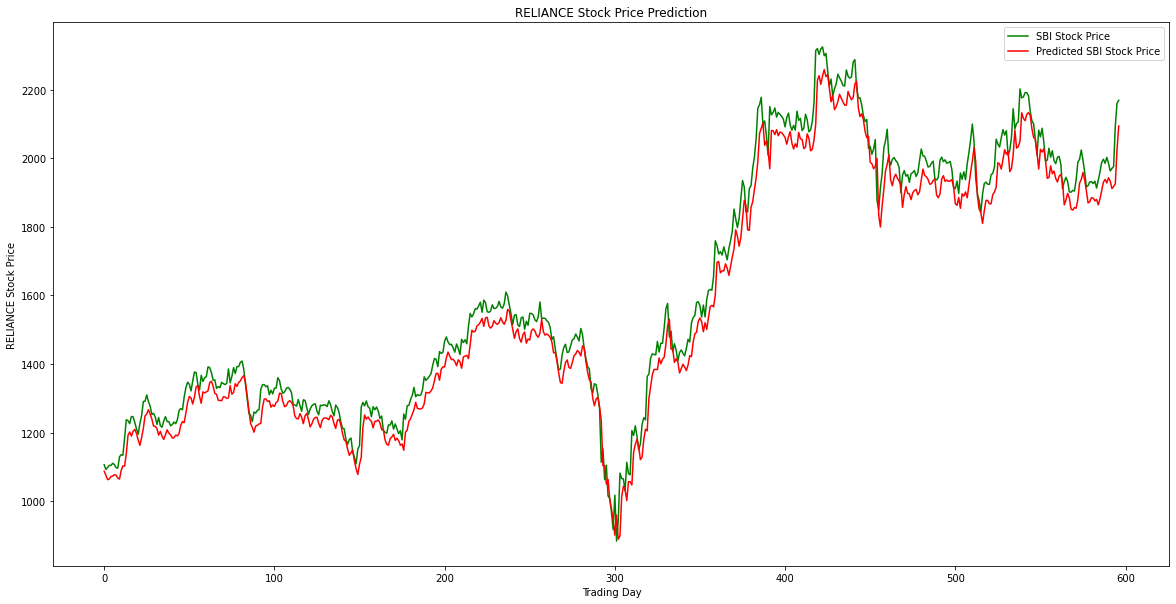

In [127]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('RELIANCE Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('RELIANCE Stock Price')
plt.legend()
plt.show()

In [128]:
real_stock_price_total.shape

(5330, 1)

In [129]:
d=real_stock_price_total.shape[0]

In [130]:
predicted_stock_price_total=np.concatenate((train_set,predicted_stock_price), axis = 0)   #Total dataset#

In [131]:
predicted_stock_price_total.shape

(5330, 1)

In [132]:
df1= pd.DataFrame(data =real_stock_price_total , columns = ['Real'])
df1.shape

(5330, 1)

In [133]:
df2=pd.DataFrame(data =predicted_stock_price_total , columns = ['predicted'])

In [134]:
e=d-c

In [135]:
dataset_total_new = pd.concat((data2, testdata), axis = 0) 

In [136]:
dataset_total_new.shape

(5330, 5)

In [137]:
dataset_total_new.head()

,Date,Open,High,Low,Close
Date,,,,,
2000-01-03,2000-01-03,237.50,251.70,237.50,251.70
2000-01-04,2000-01-04,258.40,271.85,251.30,271.85
2000-01-05,2000-01-05,256.65,287.90,256.65,282.50
2000-01-06,2000-01-06,289.00,300.70,289.00,294.35
2000-01-07,2000-01-07,295.00,317.90,293.00,314.55


In [138]:
dataset_total_new.reset_index(drop=True)


,Date,Open,High,Low,Close
0,2000-01-03,237.50,251.70,237.50,251.70
1,2000-01-04,258.40,271.85,251.30,271.85
2,2000-01-05,256.65,287.90,256.65,282.50
3,2000-01-06,289.00,300.70,289.00,294.35
4,2000-01-07,295.00,317.90,293.00,314.55
...,...,...,...,...,...
5325,2021-05-26,1975.00,1979.50,1965.30,1970.05
5326,2021-05-27,1970.30,1993.00,1962.25,1976.10
5327,2021-05-28,1990.00,2105.00,1990.00,2094.80
5328,2021-05-31,2102.00,2191.70,2085.05,2160.30


In [139]:
df11= pd.DataFrame(data = dataset_total_new['Date'], columns = ['Date'])

In [140]:
df11=df11.reset_index(drop=True)

In [141]:
result = pd.concat([df11, df1], axis=1)

In [142]:
result.index=result["Date"]

In [143]:
result_predicted=pd.concat([df11, df2], axis=1)

In [144]:
result_predicted.index=result_predicted["Date"]

In [145]:
##########Result and Result predicted are the final real and predicted respectively##########

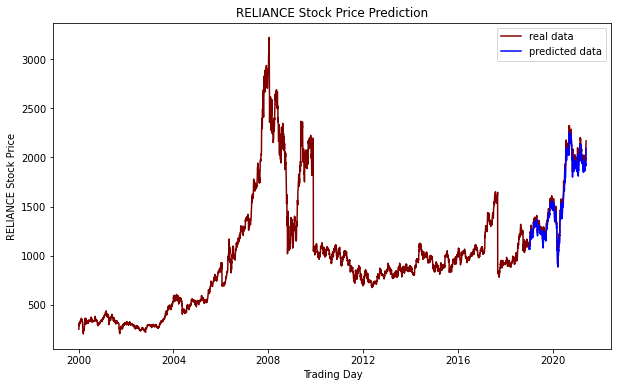

In [146]:
plt.plot(result['Real'], 'maroon', label='real data')
plt.plot(result_predicted['predicted'][e:], 'blue', label='predicted data')
plt.title('RELIANCE Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('RELIANCE Stock Price')
plt.legend()
plt.show()

In [197]:
real_stock_price.shape

(597, 1)

In [198]:
predicted_stock_price.shape

(597, 1)

In [199]:
real=real_stock_price[0:c]

In [200]:
real.shape

(597, 1)

In [201]:
# report performance
mse = mean_squared_error(real,predicted_stock_price )
print('MSE: '+str(mse))
mae = mean_absolute_error(real, predicted_stock_price)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(real, predicted_stock_price))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predicted_stock_price - real)/np.abs(real))
print('MAPE: '+str(mape))

MSE: 83726.51006943833
MAE: 213.51035415930562
RMSE: 289.35533530494706
MAPE: 0.1312398283280419


In [147]:
#########New version######## Here i used prediction as a input for the future values need some fine tuning for proper accuracy 

In [202]:
a=60

testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']

real_stock_price = testdata.iloc[:, 4:5].values
real_stock_price_total=np.concatenate((train_set,real_stock_price), axis = 0)   #Total dataset#
dataset_total = pd.concat((data2['Close'], testdata['Close']), axis = 0)   #Total dataset#

inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(a, c+a):
    X_test.append(inputs[i-a:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [203]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [204]:
inputs.shape

(657, 1)

In [205]:
data2.shape

(4733, 5)

In [206]:
predicted_stock_price.shape


(597, 1)

In [207]:
testdata.shape

(597, 5)

In [208]:
input_new=dataset_total[len(dataset_total) - len(testdata) - a:len(dataset_total) - len(testdata)].values

In [209]:
##input_new=dataset_new[len(dataset_new)- 60:].values

In [210]:
input_new.shape

(60,)

In [211]:
input_new = input_new.reshape(-1,1)
input_new = sc.transform(input_new)

In [212]:
input_new.shape

(60, 1)

In [213]:
#input_new.append(4)
#input_new = np.append(input_new, 4)

In [216]:
X_test = []

In [217]:
X_test_new = []
for i in range(0, c-1):
    X_test_new.append(input_new[i:i+a])
    X_test_mm = np.array(X_test_new)
    X_test_mm = np.reshape(X_test_mm, (X_test_mm.shape[0], X_test_mm.shape[1], 1))
    predicted_stock_price_new = regressor.predict(X_test_mm)
    input_new = np.append(input_new,predicted_stock_price_new)

In [218]:
  predicted_stock_price_new = sc.inverse_transform(predicted_stock_price_new)

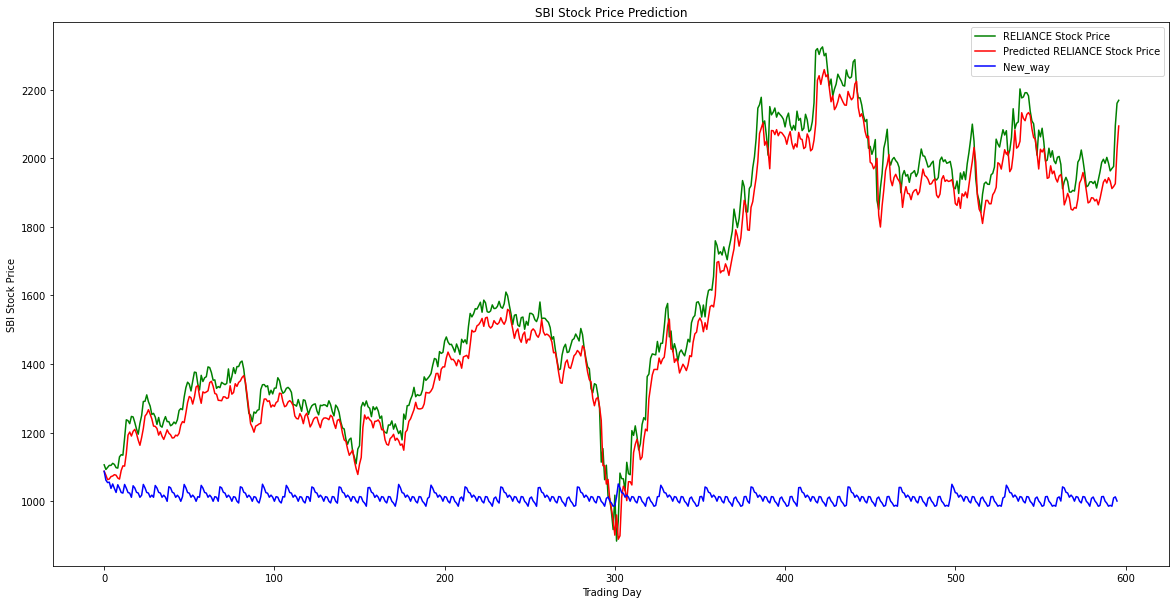

In [219]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'RELIANCE Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted RELIANCE Stock Price')
plt.plot(predicted_stock_price_new, color = 'blue', label = 'New_way')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

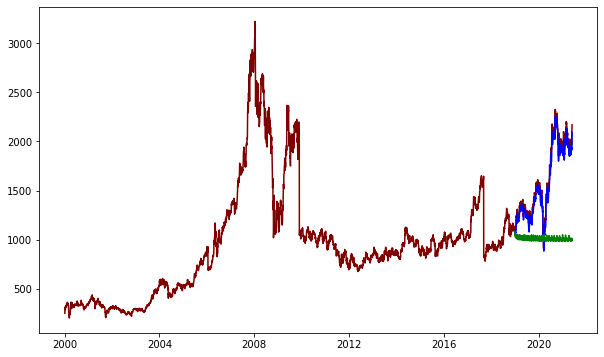

In [220]:
predicted_stock_price_total_new=np.concatenate((train_set,predicted_stock_price_new), axis = 0)   #Total dataset#
df3=pd.DataFrame(data =predicted_stock_price_total_new , columns = ['New'])
result_predicted_new=pd.concat([df11, df3], axis=1)
result_predicted_new.index=result_predicted_new["Date"]
plt.plot(result['Real'], 'maroon', label='real data')
plt.plot(result_predicted['predicted'][e:], 'blue', label='predicted data')
plt.plot(result_predicted_new['New'][e:], 'green', label='New')